In [2]:
import os
os.getcwd()

'C:\\Users\\Carsten\\source\\repos\\ZeeguuArchRecon'

In [46]:
from git import Repo
SourceFolder = 'C:\\Users\\Carsten\\source\\repos\\Zeeguu-Core\\'
#Repo.clone_from('https://github.com/zeeguu-ecosystem/Zeeguu-Core', SourceFolder)

In [7]:
from pathlib import Path

def LOC(file):
    return sum([1 for line in open(file)])

files = [str(file) for file in Path('C:\\Users\\Carsten\\source\\repos\\Zeeguu-Core').rglob('*.py')]


In [11]:
files_and_LOCs = [(file, LOC(file)) for file in files]

In [16]:
files_and_LOCs.sort(key = lambda x: -x[1])

In [18]:
sum(LOC(file) for file in files)

14977

In [21]:
import re
def import_from_line(line):
    i = re.search('from (\S+)', line)
    if i:
        return i.group(1)
    i = re.search('import (\S+)', line)
    if i:
        return i.group(1)
    return None
    

In [29]:
def imports_from_file(file):
    return [import_from_line(line) for line in open(file) if import_from_line(line)]

In [ ]:
for file in files:
    print(file + ": " + str(imports_from_file(file)))

In [47]:
def module_from_file_path(full_path, folder_prefix = SourceFolder):
    file_name = full_path[len(folder_prefix):]
    file_name = file_name.replace('\\', '.')
    file_name = file_name.replace('.py', '')
    return file_name


In [ ]:
for file in files:
    print(file + ": " + module_from_file_path(file))

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.Graph()

for file in files:
    m = module_from_file_path(file)
    g.add_node(m)
    
    for i in imports_from_file(file):
        g.add_edge(m, i)
    
plt.figure(figsize=(20,20))
nx.draw(g, with_labels=True)
plt.show()

# Packages #

In [107]:
from pathlib import PurePath

def package_from_file_path(full_path, folder_prefix = SourceFolder):
    file = full_path[len(folder_prefix):]
    path = str(PurePath(file).parent)
    path = path.replace('\\', '.')
    if path == '':
        path = '.'
    return path

init_files = [f for f in files if f.endswith('__init__.py')]
packages = [package_from_file_path(f) for f in init_files]
print('Num packages: ' + str(len(packages)))

Num packages: 30


In [80]:
modules = [f for f in files if not f.endswith('__init__.py')]

In [85]:
module_to_package = {}
for m in modules:
    module_to_package[m] = package_from_file_path(m)


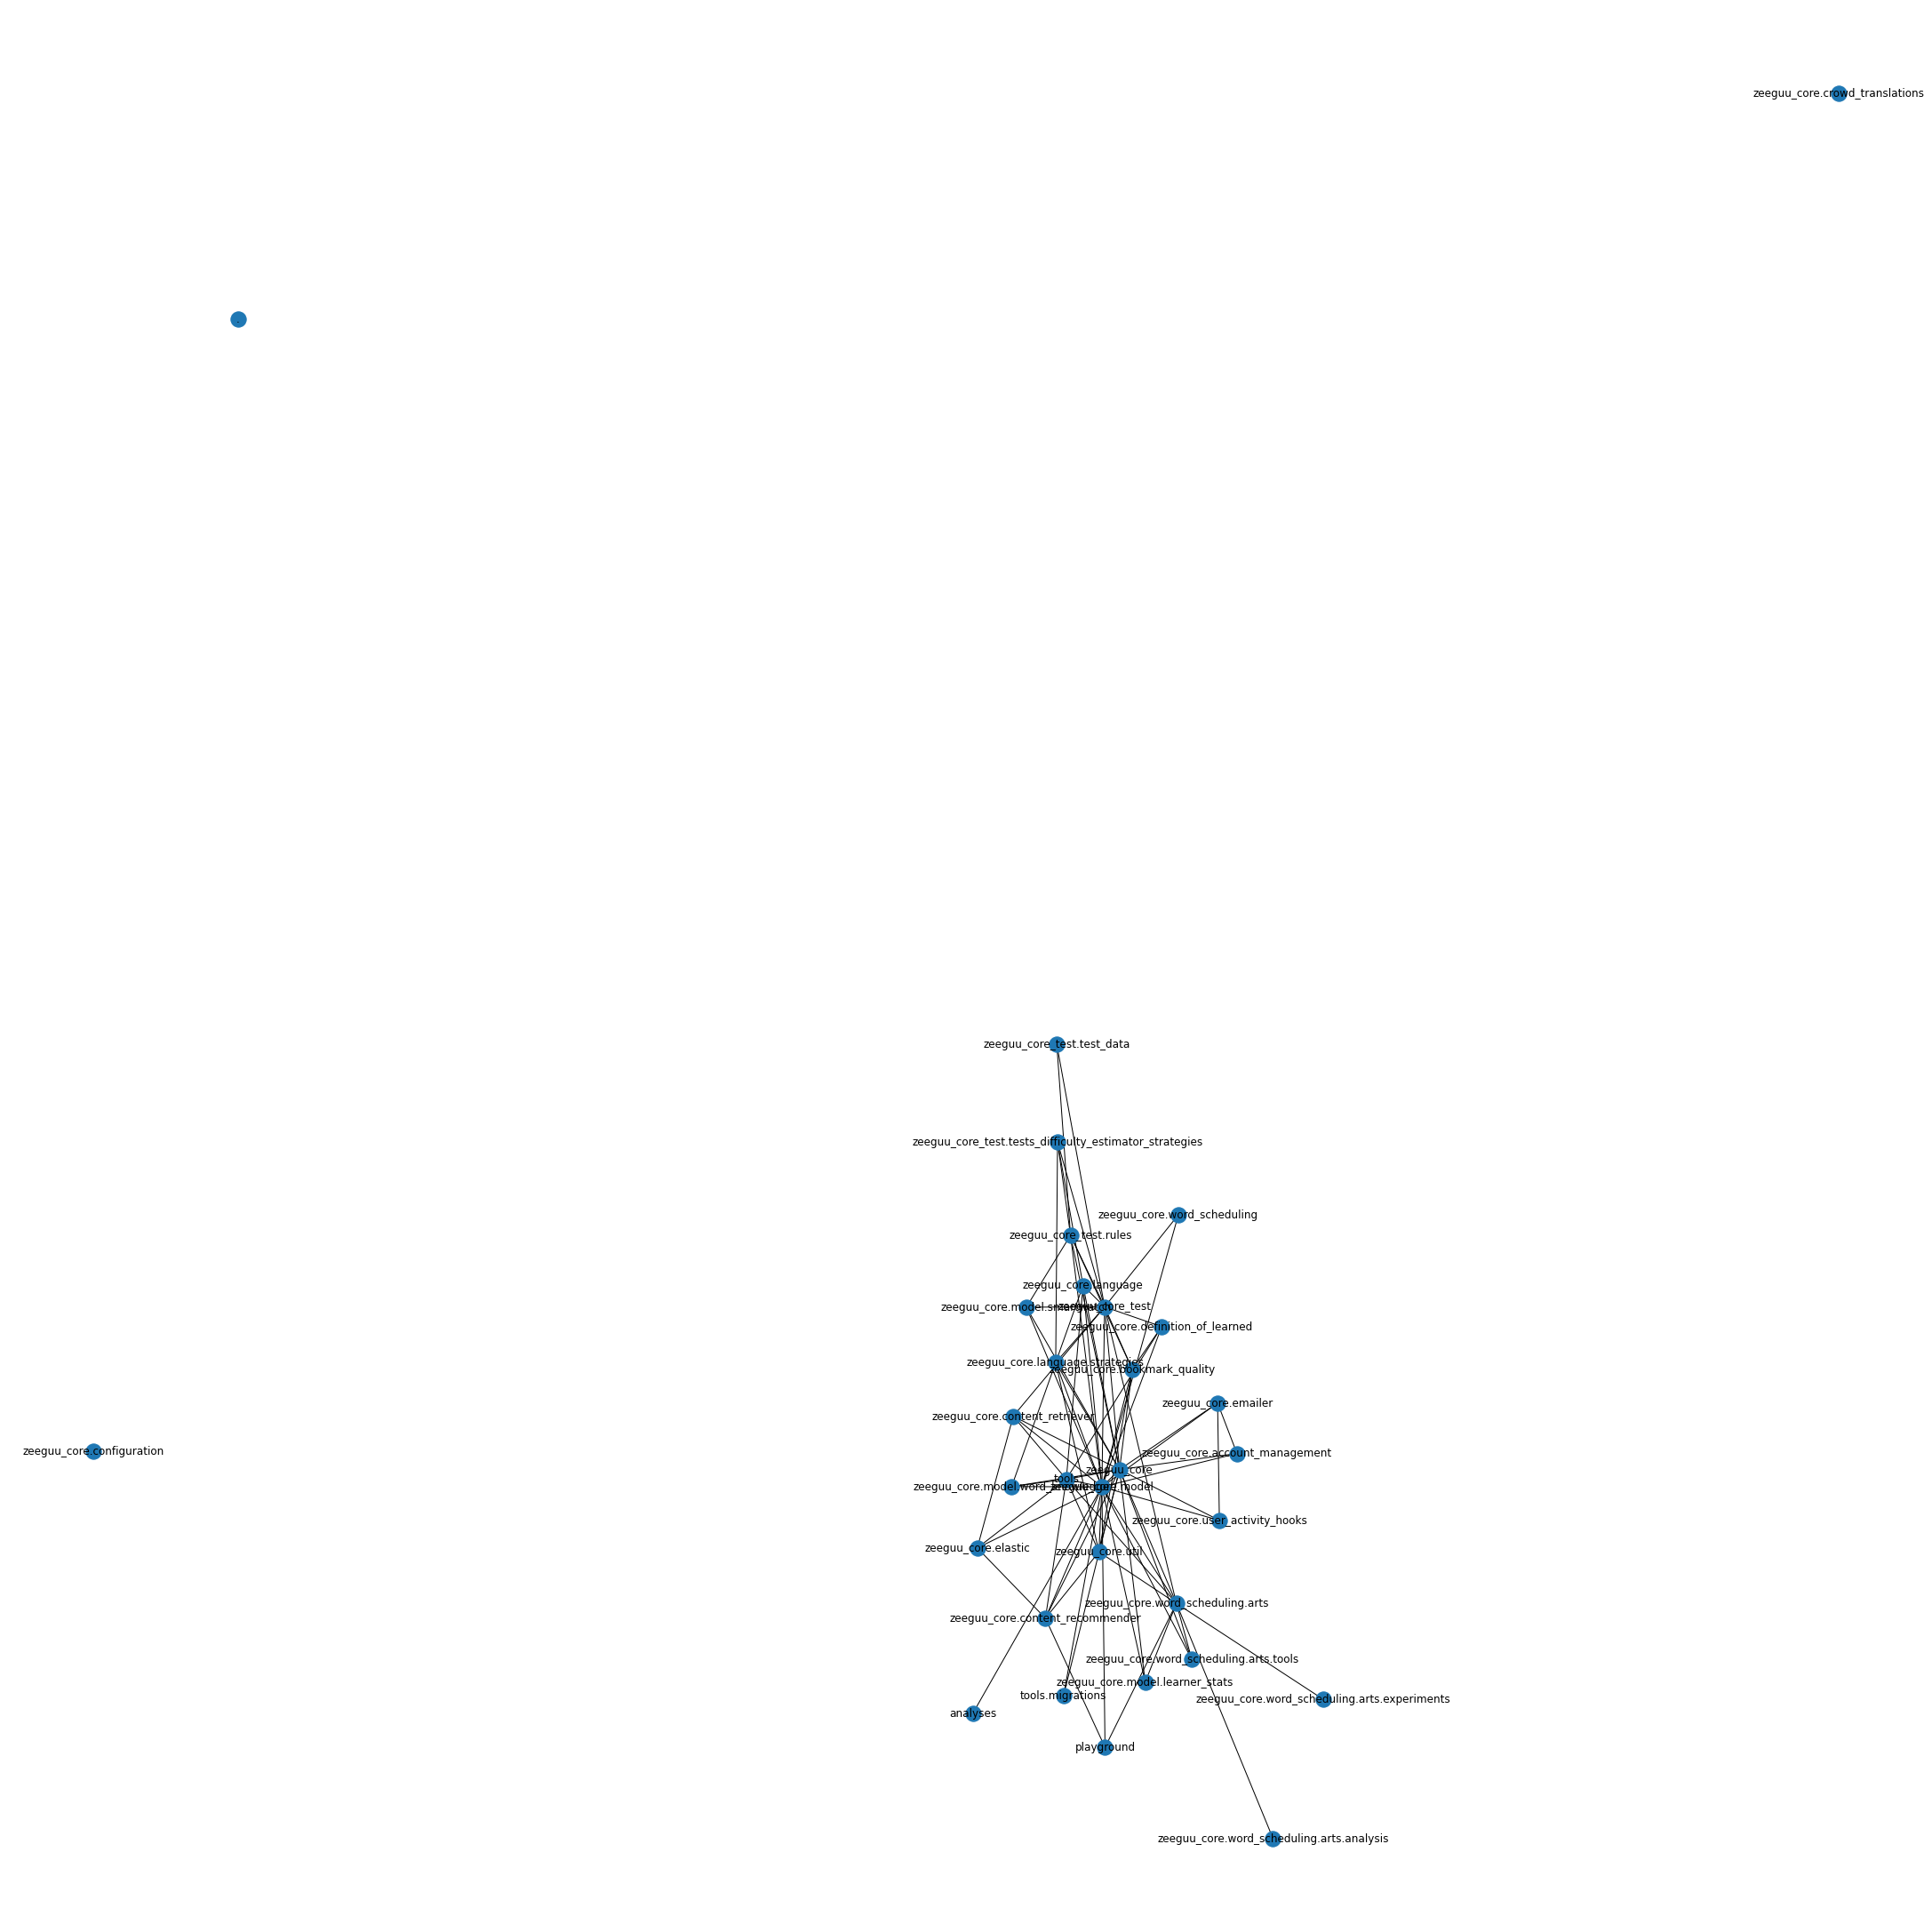

In [122]:
g = nx.Graph()
for p in packages:
    g.add_node(p)

for m in modules:
    #print('Module: ' + m)
    p = module_to_package[m]
    #print('Package: ' + p)
    imports = imports_from_file(m)
    for i in imports:
        if i in packages:
            g.add_edge(p, i)
        elif i[:i.rfind('.')] in packages:
            g.add_edge(p, i[:i.rfind('.')])

plt.figure(figsize=(30,30))
nx.draw(g, with_labels=True)
plt.show()


In [ ]:
packages_and_degrees = [(p, g.degree(p)) for p in packages]
packages_and_degrees.sort(key = lambda x: -x[1])
packages_and_degrees
